In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')



> Add blockquote

> Add blockquote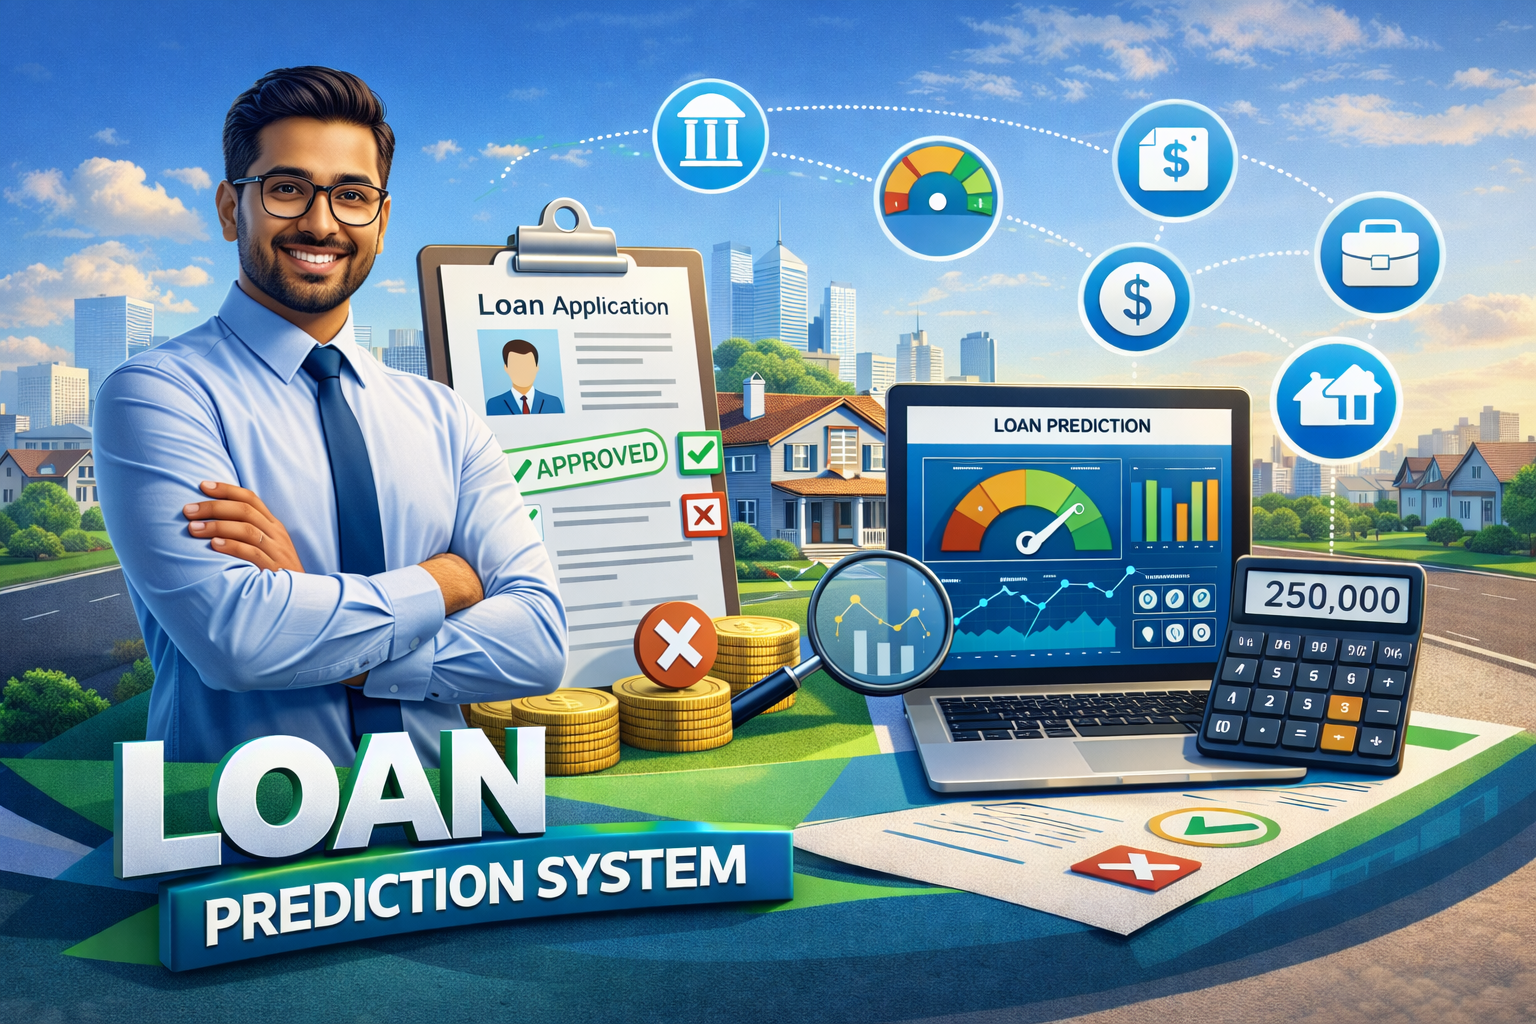





In [ ]:
loan_dataset.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
300,LP001964,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban,N
315,LP002031,Male,Yes,1,Not Graduate,No,3399,1640.0,111.0,180.0,1.0,Urban,Y
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
520,LP002689,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

/tmp/ipython-input-474101102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


In [ ]:
from collections import OrderedDict
#stastistic
numeric_cols = loan_dataset.select_dtypes(include=['number']).columns

stats = []
for i in numeric_cols:
    numerical_stats = OrderedDict({
        "Feature": i,
        "max": loan_dataset[i].max(),
        "min": loan_dataset[i].min(),
        "mean": loan_dataset[i].mean(),
        "median": loan_dataset[i].median(),
        "standard deviation": loan_dataset[i].std(),
        "variance": loan_dataset[i].var(),
        "skewness": loan_dataset[i].skew(),
        "kurtosis": loan_dataset[i].kurt(),
        "25%": loan_dataset[i].quantile(0.25),
        "75%": loan_dataset[i].quantile(0.75),
        "IQR": loan_dataset[i].quantile(0.75) - loan_dataset[i].quantile(0.25)
    })
    stats.append(numerical_stats)

# Create DataFrame report
report = pd.DataFrame(stats)
print(report.T)

                          0         1          2              3   \
Feature               Gender   Married  Education  Self_Employed   
max                      1.0       1.0        1.0            1.0   
min                      0.0       0.0        0.0            0.0   
mean                0.820833  0.647917   0.797917         0.1375   
median                   1.0       1.0        1.0            0.0   
standard deviation  0.383892  0.478118   0.401973       0.344734   
variance            0.147373  0.228597   0.161582       0.118841   
skewness           -1.678471 -0.621334  -1.488474       2.111872   
kurtosis            0.820667 -1.620714   0.216439       2.470279   
25%                      1.0       0.0        1.0            0.0   
75%                      1.0       1.0        1.0            0.0   
IQR                      0.0       1.0        0.0            0.0   

                                 4                  5            6   \
Feature             ApplicantIncome  Coappli

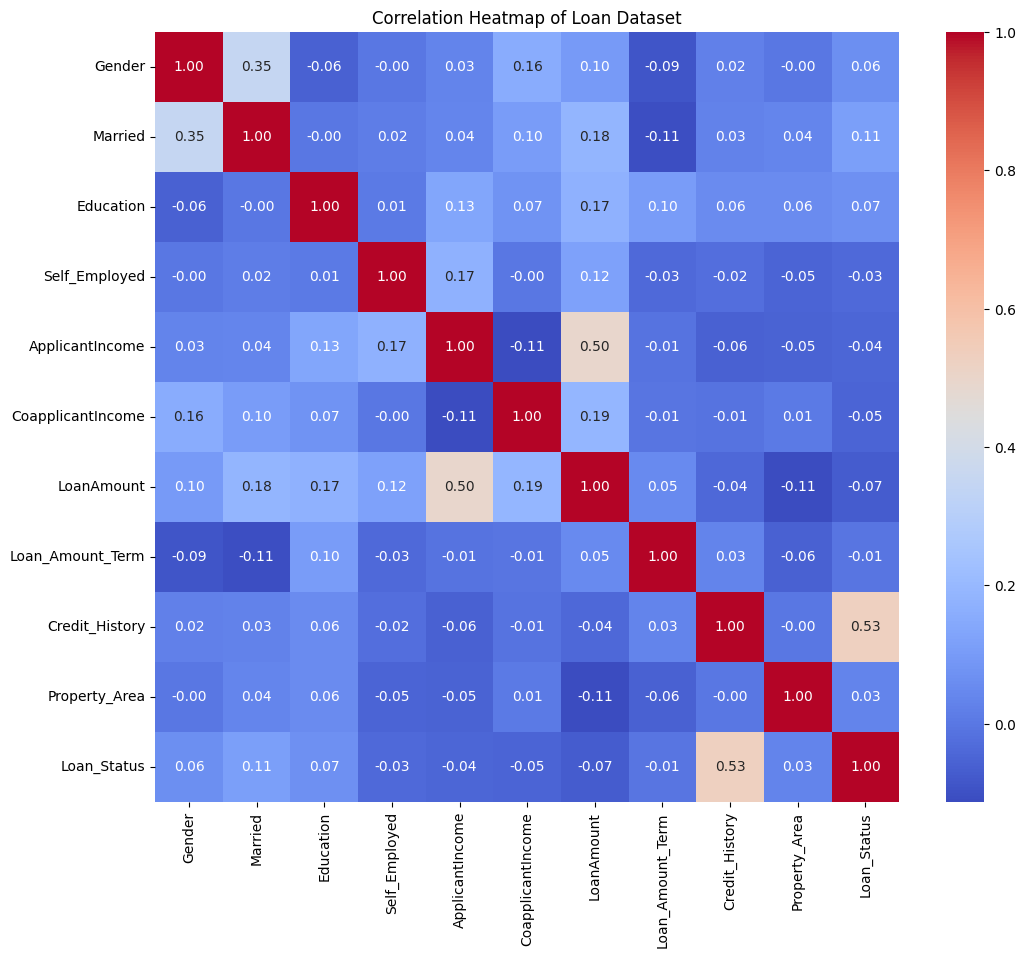

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(loan_dataset.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Loan Dataset')
plt.show()

<Axes: xlabel='Education', ylabel='count'>

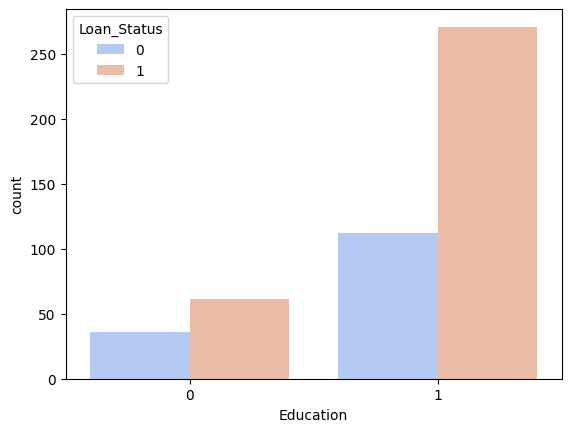

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset, palette='coolwarm')

<Axes: xlabel='Married', ylabel='count'>

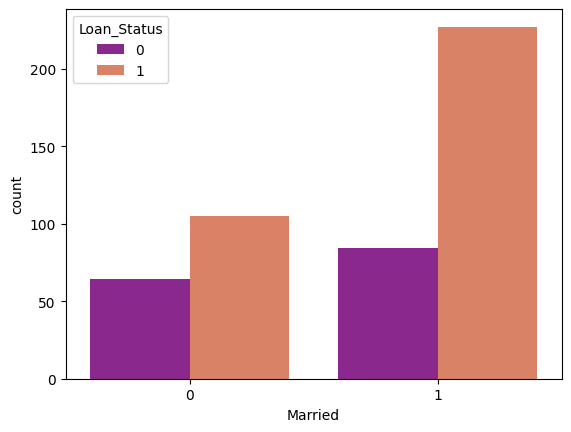

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset, palette='plasma')

/tmp/ipython-input-1937566911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Loan_Status', data=loan_dataset, palette='magma')


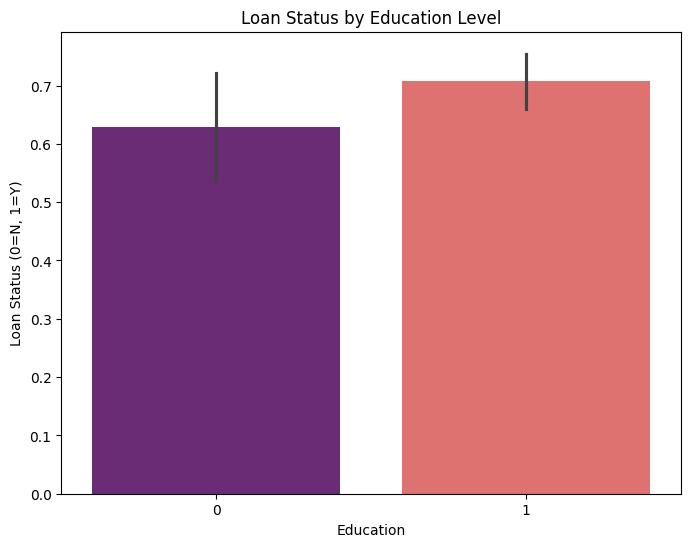

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Loan_Status', data=loan_dataset, palette='viridis')
plt.title('Loan Status by Education Level')
plt.xlabel('Education')
plt.ylabel('Loan Status (0=N, 1=Y)')
plt.show()

This bar plot visualizes the average `Loan_Status` (where 0 is 'N' and 1 is 'Y') for each `Education` category. A higher bar indicates a higher proportion of approved loans for that education level. The `magma` palette was used for coloring.

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

/tmp/ipython-input-2432111705.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
#train and split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
#Training the model:
#Support Vector Machine Model
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:

sample_input = np.array([
    1,    # Gender: Male (1)
    1,    # Married: Yes (1)
    1,    # Dependents: 1
    1,    # Education: Graduate (1)
    0,    # Self_Employed: No (0)
    5000, # ApplicantIncome
    1000, # CoapplicantIncome
    120,  # LoanAmount
    360,  # Loan_Amount_Term
    1,    # Credit_History: Yes (1)
    1     # Property_Area: Semiurban (1)
]).reshape(1, -1)

# Create a DataFrame for the sample input, ensuring column names match X_train
sample_input_df = pd.DataFrame(sample_input, columns=X_train.columns)

# Make the prediction
prediction = classifier.predict(sample_input_df)

if (prediction[0] == 1):
    print('The applicant is likely to get a loan.')
else:
    print('The applicant is unlikely to get a loan.')


The applicant is likely to get a loan.


In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [ ]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334
